In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load Dataset
df = pd.read_csv(r"C:\Users\Swati\Downloads\cleaned_jobs_and_future_works_data.csv")
df

,Name,Base Pay,University or Office,Position
0,"Driscoll, Michael Allan",275000.0,Indiana,University President
1,"Weisenstein, Greg R",241935.0,West Chester,University President
2,"Welsh, Marcia L",230000.0,East Stroudsburg,University President
3,"Norton, Cheryl J.",225000.0,Slippery Rock,University President
4,"Wollman, Julie E.",225000.0,Edinboro,University President
...,...,...,...,...
12627,"Black, Jacqueline D",1254.0,Edinboro,"Instructor, PT Temp"
12628,"Webster, Kim",1245.0,Kutztown,Instructor
12629,"Hanelly, William T",152950.0,Lock Haven,Vice President/Fin.Admin
12630,"Moran, James D Iii",193125.0,Office of the Chancellor,Vice Chancellor Academic & Student Affairs


In [5]:
# To see the 1st five records of df
df.head()

,Name,Base Pay,University or Office,Position
0,"Driscoll, Michael Allan",275000.0,Indiana,University President
1,"Weisenstein, Greg R",241935.0,West Chester,University President
2,"Welsh, Marcia L",230000.0,East Stroudsburg,University President
3,"Norton, Cheryl J.",225000.0,Slippery Rock,University President
4,"Wollman, Julie E.",225000.0,Edinboro,University President


In [6]:
#To see last 5 records of df
df.tail()

,Name,Base Pay,University or Office,Position
12627,"Black, Jacqueline D",1254.0,Edinboro,"Instructor, PT Temp"
12628,"Webster, Kim",1245.0,Kutztown,Instructor
12629,"Hanelly, William T",152950.0,Lock Haven,Vice President/Fin.Admin
12630,"Moran, James D Iii",193125.0,Office of the Chancellor,Vice Chancellor Academic & Student Affairs
12631,"Cavanaugh, John C",327500.0,Office of the Chancellor,Chancellor


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  12632 non-null  object 
 1   Base Pay              12632 non-null  float64
 2   University or Office  12632 non-null  object 
 3   Position              12632 non-null  object 
dtypes: float64(1), object(3)
memory usage: 394.9+ KB


In [8]:
df.isnull().sum()

Name                    0
Base Pay                0
University or Office    0
Position                0
dtype: int64

In [ ]:
#Average Salary
average_salary = df["Base Pay"].mean()
print("\nAverage Salary:", average_salary)



Average Salary: 57575.800823305886


In [10]:
#Top 10 Highest Paid Employees
top_10 = df.sort_values(by="Base Pay", ascending=False).head(10)
print("\nTop 10 Highest Paid Employees:")
print(top_10[["Name", "University or Office", "Position", "Base Pay"]])


Top 10 Highest Paid Employees:
                             Name      University or Office  \
12631           Cavanaugh, John C  Office of the Chancellor   
0         Driscoll, Michael Allan                   Indiana   
1             Weisenstein, Greg R              West Chester   
2                 Welsh, Marcia L          East Stroudsburg   
3               Norton, Cheryl J.             Slippery Rock   
4               Wollman, Julie E.                  Edinboro   
5             Mcnairy, Francine G              Millersville   
7               Whitney, Karen M.                   Clarion   
6          Fiorentino, Michael Jr                Lock Haven   
8      Cevallos, Francisco Javier                  Kutztown   

                   Position  Base Pay  
12631            Chancellor  327500.0  
0      University President  275000.0  
1      University President  241935.0  
2      University President  230000.0  
3      University President  225000.0  
4      University President  22500

In [13]:

#University-wise Average Salary
university_avg = df.groupby("University or Office")["Base Pay"].mean().sort_values(ascending=False)
print("\nUniversity-wise Average Salary:")
print(university_avg)


University-wise Average Salary:
University or Office
Office of the Chancellor    77908.282051
Indiana                     60435.730846
Slippery Rock               59639.678768
Lock Haven                  59552.683746
Shippensburg                59179.559055
East Stroudsburg            58942.125174
Kutztown                    58357.909091
Clarion                     57534.781081
Edinboro                    57438.013648
Bloomsburg                  56145.716241
Cheyney                     55316.965157
West Chester                55178.412776
California                  54780.910633
Mansfield                   54497.610478
Millersville                54092.442270
Name: Base Pay, dtype: float64


In [14]:
#Plot Top 5 Universities by Average Salary
top_5_universities = university_avg.head(5)

In [20]:
# Total rows and columns
print("Shape of Dataset:", df.shape)

Shape of Dataset: (12632, 4)


In [23]:
# Top 5 universities by number of employees
top_universities = df["University or Office"].value_counts().head(5)

print("Top 5 Universities by Employee Count:")
print(top_universities)

Top 5 Universities by Employee Count:
University or Office
West Chester    1628
Indiana         1501
Bloomsburg      1096
Millersville    1022
Kutztown         990
Name: count, dtype: int64


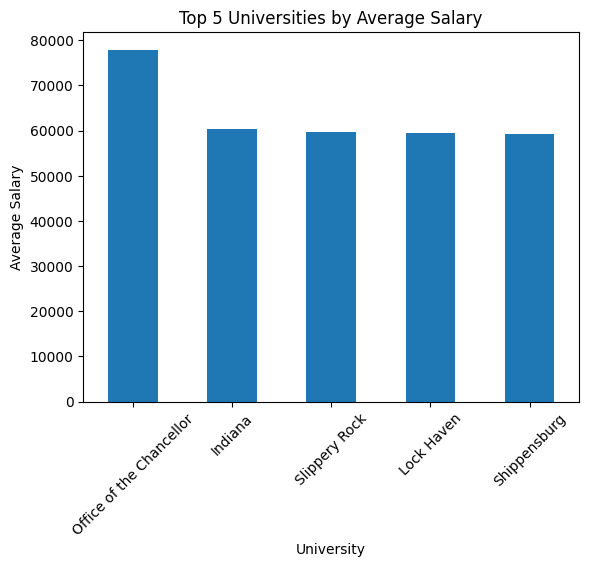

In [ ]:
# Bar chart
# university_avg = df.groupby("University or Office")["Base Pay"].mean().sort_values(ascending=False).head(5)

plt.figure()
university_avg.plot(kind='bar')
plt.title("Top 5 Universities by Average Salary")
plt.xlabel("University")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()

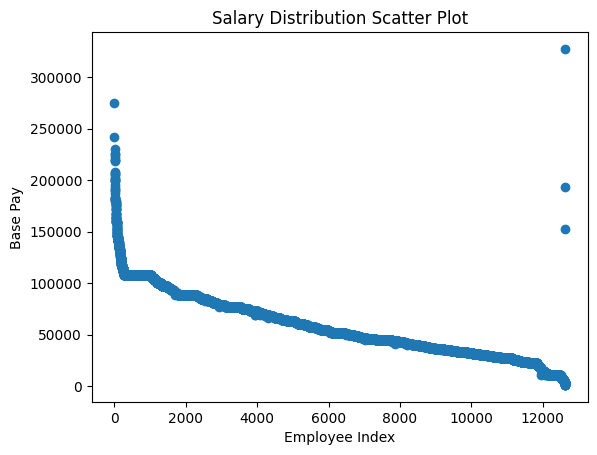

In [ ]:
#scatter chart
# plt.figure()
plt.scatter(df.index, df["Base Pay"])
plt.title("Salary Distribution Scatter Plot")
plt.xlabel("Employee Index")
plt.ylabel("Base Pay")
plt.show()

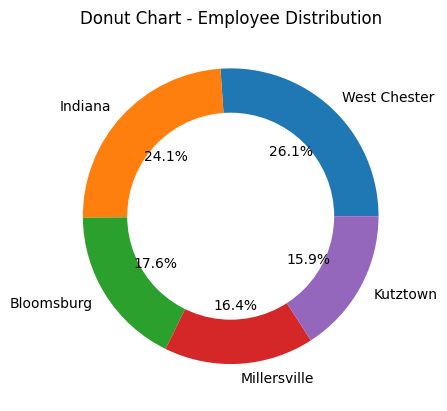

In [ ]:
#Donut chart
# plt.figure()
plt.pie(top_universities, labels=top_universities.index, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Donut Chart - Employee Distribution")
plt.show()

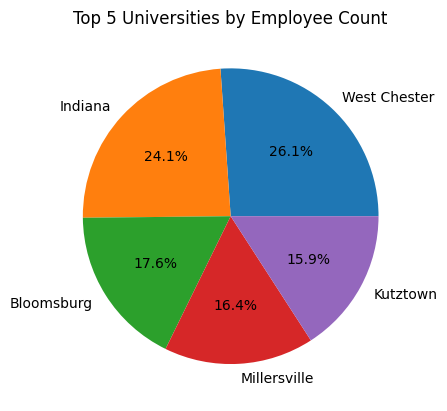

In [ ]:
#Pie chart
# # Top 5 universities by employee count
top_universities = df["University or Office"].value_counts().head(5)

plt.figure()
plt.pie(top_universities, labels=top_universities.index, autopct='%1.1f%%')
plt.title("Top 5 Universities by Employee Count")
plt.show()